In [25]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict , Literal

In [26]:
class QuadraticEquationState(TypedDict):
    a: float
    b: float
    c: float
    equation:str
    discriminant:float
    root_1:float
    root_2:float
    solution:str


In [27]:
def quadratic_equation(state: QuadraticEquationState) -> QuadraticEquationState:
    equation = ""
    if state['a'] != 0:
        equation += f"{state['a']}x²"
    if state['b'] != 0:
        equation += f" {'+' if state['b']>0 else '-'} {state['b'] if state['b']>0 else -state['b']}x"
    if state['c'] != 0:
        equation += f" {'+' if state['c']>0 else '-'} {state['c'] if state['c']>0 else -state['c']}"
    equation += " = 0"
    return {"equation": equation}

In [28]:
def calculate_discriminant(state: QuadraticEquationState) -> QuadraticEquationState:
    discriminant = state['b']**2 - 4*state['a']*state['c']
    return {"discriminant": discriminant}


In [29]:
def calculate_real_roots(state: QuadraticEquationState) -> QuadraticEquationState:
    root_1 = (-state["b"] + (state["discriminant"] ** 0.5)) / (2 * state["a"])
    root_2 = (-state["b"] - (state["discriminant"] ** 0.5)) / (2 * state["a"])
    solution = f"The real roots are {root_1} and {root_2}"
    return {"root_1": root_1, "root_2": root_2, "solution": solution}

In [30]:
def calculate_repeated_root(state: QuadraticEquationState) -> QuadraticEquationState:
    root = -state["b"] / (2 * state["a"])
    solution = f"The repeated root is {root}"
    return {"root_1": root, "root_2": root, "solution": solution}


In [50]:
def calculate_complex_roots(state: QuadraticEquationState) -> QuadraticEquationState:
    real_part = -state["b"] / (2 * state["a"])
    imaginary_part = (abs(state["discriminant"]) ** 0.5) / (2 * state["a"])
    root_1 = f"{real_part} + {imaginary_part:.2f}i"
    root_2 = f"{real_part} - {imaginary_part:.2f}i"
    solution = f"The complex roots are {root_1} and {root_2}"
    return {"root_1": root_1, "root_2": root_2, "solution": solution}

In [51]:
def check_discriminant(
    state: QuadraticEquationState,
) -> Literal[
    "calculate_real_roots", "calculate_repeated_root", "calculate_complex_roots"
]:
    if state["discriminant"] > 0:
        return "calculate_real_roots"
    elif state["discriminant"] == 0:
        return "calculate_repeated_root"
    else:
        return "calculate_complex_roots"

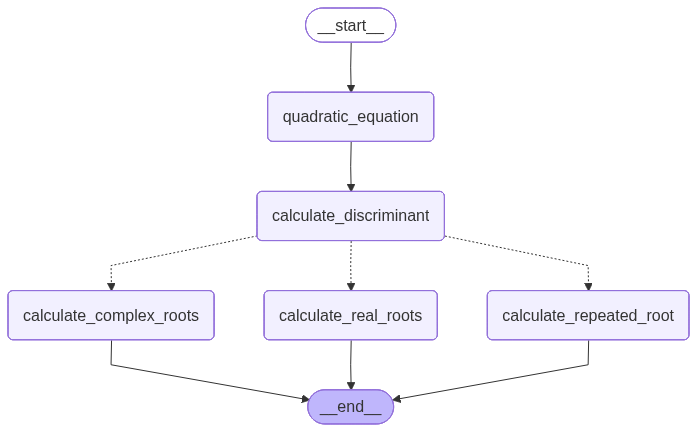

In [52]:
graph = StateGraph(QuadraticEquationState)

graph.add_node("quadratic_equation", quadratic_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("calculate_real_roots",calculate_real_roots)
graph.add_node("calculate_repeated_root",calculate_repeated_root)
graph.add_node("calculate_complex_roots",calculate_complex_roots)

graph.add_edge(START, "quadratic_equation")
graph.add_edge("quadratic_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",check_discriminant)
graph.add_edge("calculate_real_roots",END)
graph.add_edge("calculate_repeated_root",END)
graph.add_edge("calculate_complex_roots",END)

workflow = graph.compile()
workflow

In [53]:
initial_state = {"a":4,"b":-5,"c":-4}
workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x² - 5x - 4 = 0',
 'discriminant': 89,
 'root_1': 1.8042476415070754,
 'root_2': -0.5542476415070754,
 'solution': 'The real roots are 1.8042476415070754 and -0.5542476415070754'}

In [54]:
initial_state = {"a":20,"b":-5,"c":4}
workflow.invoke(initial_state)

{'a': 20,
 'b': -5,
 'c': 4,
 'equation': '20x² - 5x + 4 = 0',
 'discriminant': -295,
 'root_1': '0.125 + 0.43i',
 'root_2': '0.125 - 0.43i',
 'solution': 'The complex roots are 0.125 + 0.43i and 0.125 - 0.43i'}

In [55]:
initial_state = {"a":4,"b":-4,"c":1}
workflow.invoke(initial_state)

{'a': 4,
 'b': -4,
 'c': 1,
 'equation': '4x² - 4x + 1 = 0',
 'discriminant': 0,
 'root_1': 0.5,
 'root_2': 0.5,
 'solution': 'The repeated root is 0.5'}